## Example of loading and plotting atlas data

In [1]:
import numpy as np
from astropy.io import fits
import atlastools
from astropy import units as u

Define which atlas file to read, and then extract high level overview of file contents.

In [2]:
atlas_files_base = 'atlasfiles/'
file  = atlas_files_base + 'neckel.hamburg.atlas.wvscl_smooth.bintab.v3.fits.gz'
#file  = atlas_files_base + 'stenflo.SS3.5mA.bintab.v2.fits'
#file  = atlas_files_base + 'kitt.peak.ir.1-5micron.atlas.wavelnth.bintab.fits.gz'
#file  = atlas_files_base + 'kitt.peak.quietsun.350-740nm.1998.v1.fits.gz'

extension   = 1
atlasdict_1 = atlastools.make_dictionary(file,1)
fileopen    = fits.open(file, memmap=True)

atlas_name  = fileopen[1].header['ATL_NAME']

wave_col_id = fileopen[0].header['ATLWVCOL']
waveref_col = (atlastools.find_column_index(atlasdict_1, wave_col_id))[0].pop()
wavemin     = atlastools.search_key('TDMIN' + waveref_col[0], atlasdict_1)
wavemax     = atlastools.search_key('TDMAX' + waveref_col[0], atlasdict_1)
waveunit    = (atlastools.search_key('TCUNI' + waveref_col[0], atlasdict_1))[0]
waveunit_ap = atlastools.tunit_str_to_unit(waveunit[0])
wavemin     = wavemin[0] * waveunit_ap
wavemax     = wavemax[0] * waveunit_ap

print("Atlas Name: ",atlas_name)
print("Overall Wavelength Interval: ",wavemin," - ",wavemax)

filemap = atlastools.filecontent_map(file)
filemap.file_info()
filemap.list_extensions()


Atlas Name:  Neckel/Hamburg/FTS Normalized Atlas 1999
Overall Wavelength Interval:  [329.00013] nm  -  [1250.99824853] nm
General file information:

Object: Sun
Atlas source: Neckel/Hamburg/FTS 1999
Atlas acquisition site: Kitt Peak Observatory
Atlas wavelength coverage: 329.00 nm – 1251.00 nm
Number of Extensions: 2

EXTENSION 1:

	Waveranges per column:

	Column 0 parameter range: (329.00013, 1250.99824853) Nanometers
	Column 1 parameter range: (3.58625e-05, 1.01019) Relint
	Column 2 parameter range: (762.12, 4666.06) W m^(-2) sr^(-1) Angstrom^(-1)


	Specific column components:

	Column 0:
	 Wavelength Scale   --   1
	Column 1:
	 Local Intensity   --   1
	Column 2:
	 Local Flux   --   1




Now load the actual atlas data from the file (and from a specific extension, if applicable). The basic call will load the full atlas, or the *startwave* or *endwave* values can be used to just load in the desired wavelength interval. Data will be loaded into an **atlas_object**:

**atlas_object.target** -- defines target (where on Sun, solar features, etc.)\
**atlas_object.source** -- who generated and published the atlas contents\
**atlas_object.observatory** -- where were the atlas data acquired\
**atlas_object.sun** -- a Spec1D object which contains the primary solar spectrum\
**atlas_object.atm** -- a Spec1D object which contains the primary telluric spectrum (if any)\
**atlas_object.components** -- a dictionary of spec1D objects containing all spectra loaded from file



In [3]:
# only one extension in this file
extension = 1
# If loaddata=1 is not provided, the FITS header will be parsed 
# and populated into the atlas object, but the actual atlas data will not be loaded.
# startwave and endwave allow only a limited range of the atlas contents to be loaded
atlas = atlastools.make_atlas(file, 1, loaddata=1, startwave=600*u.nm, endwave=660*u.nm)
# the atlas object contains Spec1D objects - e.g. atlas.sun - with a spectral axis and flux 
# that contain the actual data that can be processed further
print(atlas.sun.spectral_axis)
print(atlas.sun.flux)
print(atlas.components['Local Flux   1'].flux)

checking  ['Wavelength Scale   1', 'Local Intensity   1', 'Local Flux   1']
keywords  ['TTYPE1', 'TTYPE2', 'TTYPE3']
Wavelength Scale   1
Primary Wavelength Scale TTYPE1 Wavelength Scale   1
Local Intensity   1
Local Flux   1
Wavelength Scale   1 [['1']]
<class 'str'> Nanometers
83445
populating solar atlas object
[600.00025667 600.00091034 600.00156402 ... 659.99792355 659.99871449
 659.99950542] nm
[0.9989517  0.9997782  1.0001913  ... 0.9946021  0.99448997 0.99425966]
[3240.81   3240.81   3240.8    ... 2819.64   2819.6301 2819.6301]


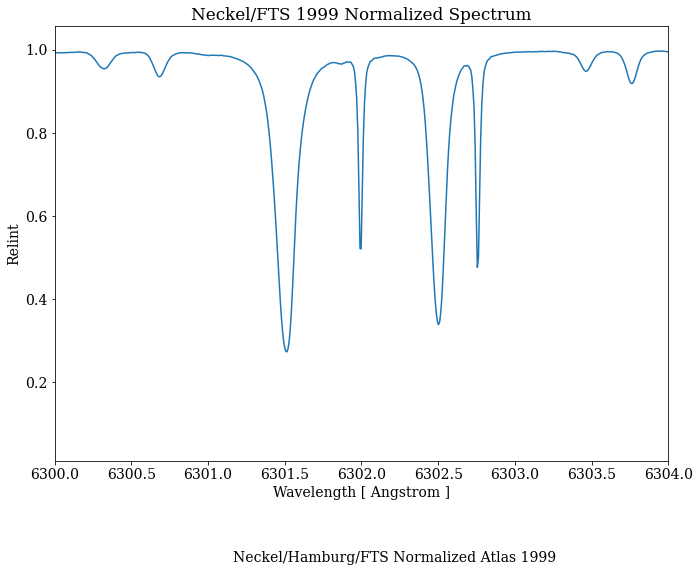

In [4]:
atlastools.atlas_spectrum_plot('Local Intensity   1', atlas, 
            startwave=630.0*u.nm, endwave=630.4*u.nm, plot_unit='angstrom')

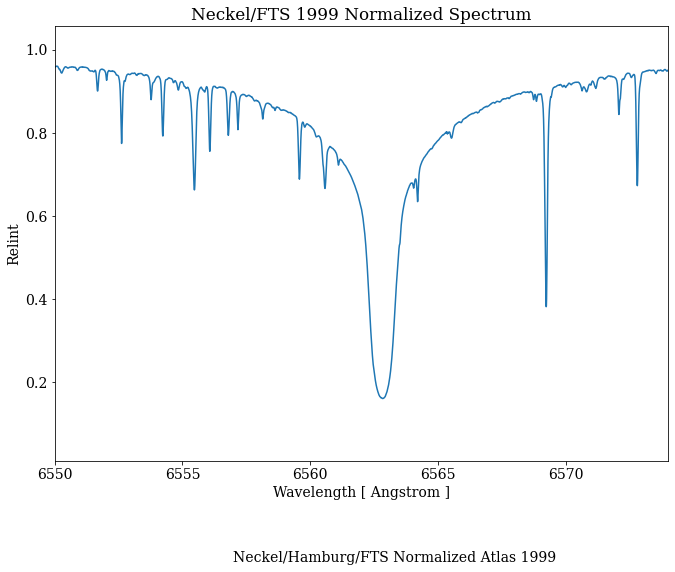

In [5]:
atlastools.atlas_spectrum_plot('Local Intensity   1', atlas, 
            startwave=655*u.nm, endwave=657.4*u.nm, plot_unit='angstrom')

checking  ['Wavelength Scale   1', 'Local Intensity   1', 'Local Flux   1']
keywords  ['TTYPE1', 'TTYPE2', 'TTYPE3']
Wavelength Scale   1
Primary Wavelength Scale TTYPE1 Wavelength Scale   1
Local Intensity   1
Local Flux   1
Wavelength Scale   1 [['1']]
<class 'str'> Nanometers
575243
populating solar atlas object


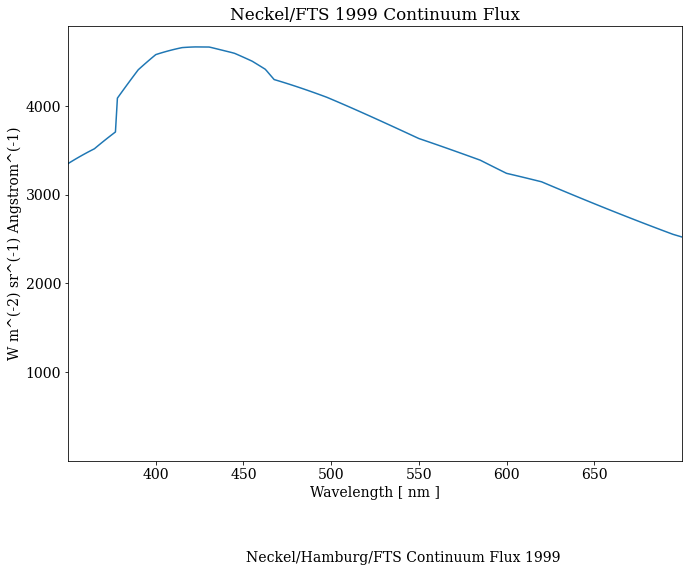

In [11]:
atlas_full = atlastools.make_atlas(file, 1, loaddata=1, startwave=350*u.nm, endwave=700*u.nm)
atlastools.atlas_spectrum_plot('Local Flux   1', atlas_full, plot_unit='nm')